In [15]:
import numpy as np 
import pandas as pd

In [16]:
# csv 파일로 변경된 데이터 값 불러오기

data = pd.read_csv('dataSets/mediapipe.csv')
df = pd.DataFrame()
column = data.columns

data

,Unnamed: 0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0,0.404536,0.529688,0.618951,0.571112,0.456162,0.488192,0.471622,0.500812,0.513581,...,-0.295611,-0.184275,-0.152557,-0.370768,-0.295700,-0.200383,-0.199378,-0.310469,-0.300989,-0.270358
1,1,0.413549,0.550150,0.651648,0.737974,0.836859,0.512048,0.510381,0.528233,0.524868,...,-0.207224,-0.103335,-0.085120,-0.277767,-0.211105,-0.119222,-0.125938,-0.225058,-0.205963,-0.169920
2,2,0.428694,0.548324,0.637845,0.704603,0.793233,0.504504,0.491107,0.479034,0.463657,...,-0.174081,-0.119419,-0.055218,-0.233537,-0.188552,-0.127729,-0.099138,-0.213463,-0.188213,-0.153526
3,3,0.428512,0.562634,0.645824,0.694422,0.759953,0.534380,0.565488,0.578466,0.584866,...,-0.072195,-0.113026,-0.024450,-0.137734,-0.149544,-0.129220,-0.076998,-0.175916,-0.193509,-0.189746
4,4,0.439062,0.581721,0.662374,0.692783,0.745174,0.521532,0.537716,0.543882,0.550136,...,0.038839,0.036572,0.004772,-0.044475,-0.082969,-0.103821,-0.052094,-0.145510,-0.194995,-0.221062
5,5,0.447015,0.596308,0.679043,0.716603,0.780620,0.534686,0.558722,0.569456,0.577209,...,0.148611,0.142359,0.075200,0.098003,0.095129,0.089080,0.034401,0.039579,0.025054,0.007471
6,6,0.514565,0.616746,0.714687,0.701368,0.608059,0.662554,0.667299,0.652823,0.654639,...,-0.260749,-0.199344,-0.133698,-0.289215,-0.247430,-0.190960,-0.159167,-0.240105,-0.243717,-0.233781
7,7,0.434622,0.548394,0.647939,0.730771,0.814155,0.592031,0.584906,0.565201,0.560264,...,-0.250373,-0.171114,-0.108494,-0.267081,-0.231023,-0.159894,-0.129600,-0.212357,-0.201349,-0.160231
8,8,0.447057,0.550971,0.646705,0.729266,0.815670,0.591321,0.585639,0.584466,0.580062,...,-0.193228,-0.158646,-0.082675,-0.200227,-0.180503,-0.142790,-0.099465,-0.175084,-0.158633,-0.129877
9,9,0.464193,0.574633,0.674884,0.762431,0.849241,0.610424,0.638908,0.655172,0.664319,...,-0.068459,-0.092891,-0.022943,-0.107665,-0.125763,-0.112620,-0.043230,-0.118749,-0.131442,-0.116952


In [17]:
x = data.iloc[13,0:21].T
y = data.iloc[13, 21:42].T
z = data.iloc[13,42:63].T

In [18]:
# 벡터로 변환

vector_columnList = [0,1,2,3,4,5,6,7,8,9,
                    10,11,12,13,14,15,16,17,18,19,
                    ]
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20],
                    ]


vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)


In [19]:
# 필요한 각도 계산

degree_list = [[1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14],
                [14,15], [16,17], [17,18], [18,19]]

result = pd.DataFrame()

for d in degree_list:
    a= -vector_data[d[0]].x*vector_data[d[1]].x -vector_data[d[0]].y*vector_data[d[1]].y - vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2 + vector_data[d[0]].y**2 + vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2 + vector_data[d[1]].y**2 + vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

a= vector_data[0].x*vector_data[3].x + vector_data[0].y*vector_data[3].y + vector_data[0].z*vector_data[3].z
b=((vector_data[0].x**2 + vector_data[0].y**2 + vector_data[0].z**2)**0.5)*((vector_data[3].x**2 + vector_data[3].y**2 + vector_data[3].z**2)**0.5)
result['vec0-3'] = np.arccos(a/b)

result

,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19,vec0-3
0,2.317458,2.222883,2.335859,0.445624,2.441599,2.308741,0.846625,2.038629,2.426766,0.722552,2.120941,2.607738,0.972293,1.934555,1.854319
1,3.084550,2.689839,2.220391,0.449578,2.495792,2.052129,0.947441,1.898099,2.147300,0.838402,2.130217,2.257090,1.031454,2.103447,0.330576
2,3.090769,2.658006,2.359367,3.085818,3.026452,1.923209,1.180300,2.058273,2.013560,0.973364,2.139392,2.185011,0.968902,2.063598,0.384916
3,2.969697,2.683642,2.748291,2.974729,3.032092,2.659906,3.034699,3.122657,2.306689,1.045882,2.705102,2.438160,1.185504,2.792393,0.281086
4,2.875999,2.744992,2.791949,2.977929,2.938198,2.874689,3.021684,3.017653,2.765186,3.006677,2.974307,2.255533,1.709090,2.814817,0.520184
5,2.870113,2.667653,2.958439,3.006892,2.969408,3.094863,2.876186,2.979795,3.005664,2.813798,3.039004,3.079152,2.853008,3.018085,0.398823
6,2.287413,2.059806,2.407586,0.517399,2.398414,2.406625,1.016871,1.948624,2.521684,0.820269,2.188766,2.647968,1.236406,2.330941,1.969306
7,3.136055,2.857961,2.219439,0.937023,2.107473,2.251630,1.112382,1.733220,2.408372,0.925385,2.016567,2.593023,1.062900,1.985773,0.346628
8,3.083618,2.923853,2.362370,3.107990,2.934071,2.119037,1.322861,2.198518,2.282108,1.054343,2.271092,2.502578,0.896512,2.348313,0.240146
9,3.080761,2.927677,2.712128,2.997871,3.012215,2.709747,2.932584,3.082321,2.181948,1.314875,2.544068,2.326992,1.346049,2.517474,0.213770


In [20]:
# val = (result>125).replace({True:1, False:0}) # 1: 핀거 0: 굽힌거
# val
# 각도에 따라 핀지 굽한지를 인식해 보았는데 이상적인 결과가 나오지 않아 방향을 바꿔보았다.

In [22]:
# 엄지 손까락을 굽혔을 경우

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

thumb_true=result[result['vec0-3']*180/np.pi>=90].iloc[:,2:]
thumb_true.iloc[:,12]=thumb_true.iloc[:,12]*2 # 엄지 손가락에 대한 가중치

thumb_true

,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19,vec0-3
0,2.335859,0.445624,2.441599,2.308741,0.846625,2.038629,2.426766,0.722552,2.120941,2.607738,0.972293,1.934555,3.708638
6,2.407586,0.517399,2.398414,2.406625,1.016871,1.948624,2.521684,0.820269,2.188766,2.647968,1.236406,2.330941,3.938612
13,2.782848,3.083075,2.961839,3.002103,2.889239,2.867211,3.001734,2.999049,2.877085,2.897636,2.886401,3.021069,4.679345
14,2.628749,1.264973,2.873113,3.017774,3.030693,3.057557,2.964722,2.804876,2.984902,2.600496,1.216792,2.328633,3.785315
15,2.312519,0.521455,2.439287,2.382478,0.930638,2.052141,2.461503,0.715547,2.241919,2.424925,1.095542,1.855161,3.958162
16,2.699622,1.671164,2.472020,2.934162,1.250345,2.621606,3.078390,0.986059,2.686327,2.853296,1.589757,2.110905,4.294932
18,2.835819,2.959871,2.876401,3.077645,2.961592,2.823317,2.869888,3.113622,2.837624,2.876565,2.934725,3.055999,5.232540
19,2.602121,0.786544,2.767329,3.019869,2.937360,2.925736,3.027913,2.743549,3.047759,2.388741,1.121789,2.856630,4.115372
20,2.536841,0.351822,2.560692,2.473452,0.811137,2.218244,2.446960,0.854207,2.185917,2.637163,1.319696,2.918364,4.272650
21,2.628949,1.894166,2.450010,2.892261,1.473555,2.475391,3.029183,1.503564,2.356208,2.895436,1.981715,1.877714,4.869283


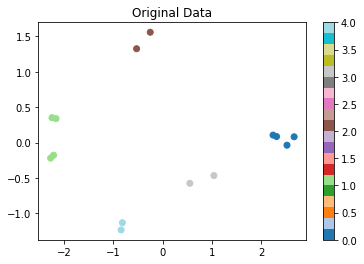

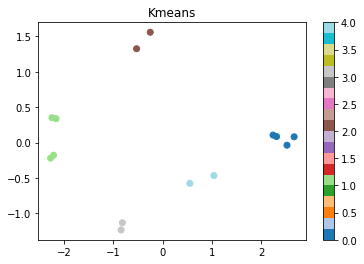

,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19,vec0-3
0,2.335859,0.445624,2.441599,2.308741,0.846625,2.038629,2.426766,0.722552,2.120941,2.607738,0.972293,1.934555,3.708638
6,2.407586,0.517399,2.398414,2.406625,1.016871,1.948624,2.521684,0.820269,2.188766,2.647968,1.236406,2.330941,3.938612
13,2.782848,3.083075,2.961839,3.002103,2.889239,2.867211,3.001734,2.999049,2.877085,2.897636,2.886401,3.021069,4.679345
14,2.628749,1.264973,2.873113,3.017774,3.030693,3.057557,2.964722,2.804876,2.984902,2.600496,1.216792,2.328633,3.785315
15,2.312519,0.521455,2.439287,2.382478,0.930638,2.052141,2.461503,0.715547,2.241919,2.424925,1.095542,1.855161,3.958162
16,2.699622,1.671164,2.472020,2.934162,1.250345,2.621606,3.078390,0.986059,2.686327,2.853296,1.589757,2.110905,4.294932
18,2.835819,2.959871,2.876401,3.077645,2.961592,2.823317,2.869888,3.113622,2.837624,2.876565,2.934725,3.055999,5.232540
19,2.602121,0.786544,2.767329,3.019869,2.937360,2.925736,3.027913,2.743549,3.047759,2.388741,1.121789,2.856630,4.115372
20,2.536841,0.351822,2.560692,2.473452,0.811137,2.218244,2.446960,0.854207,2.185917,2.637163,1.319696,2.918364,4.272650
21,2.628949,1.894166,2.450010,2.892261,1.473555,2.475391,3.029183,1.503564,2.356208,2.895436,1.981715,1.877714,4.869283


In [24]:
pca = PCA(n_components=2)
val = pca.fit_transform(thumb_true)
df = pd.DataFrame(val, columns=['x','y'])
plt.title('Original Data')
label = [0, 0, 1,2, 0,3,1,2,0,3,4,4,1,1]
plt.scatter(df.x, df.y, c= label, cmap='tab20')
plt.colorbar()
plt.show()

kmeans = KMeans(init='k-means++',n_clusters=5)
predict = kmeans.fit_predict(thumb_true)
plt.title('Kmeans')
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()
plt.show()

thumb_true

In [25]:
# 점과 점사이 유사도 계산 알고리즘

result2 = thumb_true
distance = pd.DataFrame(columns=result2.columns[:14])
for i in range(0,len(result2.index),1):
    for j in range(i+1,len(result2.index),1):
        row1=np.array(result2.iloc[i,:14])
        row2=np.array(result2.iloc[j,:14])
        distance.loc['{}-{}'.format(result2.index[i],result2.index[j])] = (row1-row2)**2

dot_distance = distance.sum(axis=1)
pd.set_option('display.max_rows',None)
dot_distance[dot_distance<1.5]

0-6      0.363370
0-15     0.152046
6-15     0.343212
6-20     0.660389
13-18    0.380244
13-35    1.004648
14-19    0.720175
15-20    1.491149
16-21    1.047041
22-27    0.445046
34-35    0.220225
dtype: float64